In [4]:
import numpy as np
import pandas as pd

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler # for normalizing numeric feature
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# import re
# import pickle
from tqdm import tqdm
# import os
from collections import Counter
from sklearn.metrics import roc_auc_score

# 1. Naive Bayes model with BOW

> Handling Nan Values and Converting_into_boolean 

In [6]:
def Converting_into_boolean(new_data):
    new_data['asian'] = new_data['asian'].fillna(0)
    new_data['asian'] = new_data['asian'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['atheist'] = new_data['atheist'].fillna(0)
    new_data['atheist'] = new_data['atheist'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['bisexual'] = new_data['bisexual'].fillna(0)
    new_data['bisexual'] = new_data['bisexual'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['black'] = new_data['black'].fillna(0)
    new_data['black'] = new_data['black'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['buddhist'] = new_data['buddhist'].fillna(0)
    new_data['buddhist'] = new_data['buddhist'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['christian'] = new_data['christian'].fillna(0)
    new_data['christian'] = new_data['christian'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['female'] = new_data['female'].fillna(0)
    new_data['female'] = new_data['female'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['heterosexual'] = new_data['heterosexual'].fillna(0)
    new_data['heterosexual'] = new_data['heterosexual'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['hindu'] = new_data['hindu'].fillna(0)
    new_data['hindu'] = new_data['hindu'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].fillna(0)
    new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['intellectual_or_learning_disability'] = new_data['intellectual_or_learning_disability'].fillna(0)
    new_data['intellectual_or_learning_disability'] = new_data['intellectual_or_learning_disability'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['jewish'] = new_data['jewish'].fillna(0)
    new_data['jewish'] = new_data['jewish'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['latino'] = new_data['latino'].fillna(0)
    new_data['latino'] = new_data['latino'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['male'] = new_data['male'].fillna(0)
    new_data['male'] = new_data['male'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['muslim'] = new_data['muslim'].fillna(0)
    new_data['muslim'] = new_data['muslim'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_disability'] = new_data['other_disability'].fillna(0)
    new_data['other_disability'] = new_data['other_disability'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_gender'] = new_data['other_gender'].fillna(0)
    new_data['other_gender'] = new_data['other_gender'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].fillna(0)
    new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_religion'] = new_data['other_religion'].fillna(0)
    new_data['other_religion'] = new_data['other_religion'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].fillna(0)
    new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['physical_disability'] = new_data['physical_disability'].fillna(0)
    new_data['physical_disability'] = new_data['physical_disability'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['psychiatric_or_mental_illness'] = new_data['psychiatric_or_mental_illness'].fillna(0)
    new_data['psychiatric_or_mental_illness'] = new_data['psychiatric_or_mental_illness'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['transgender'] = new_data['transgender'].fillna(0)
    new_data['transgender'] = new_data['transgender'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['white'] = new_data['white'].fillna(0)
    new_data['white'] = new_data['white'].apply(lambda x: 0 if x < 0.5 else 1)
    
    return new_data

> ## Hyperparameter Tunning.

### Loding Preprocessed data  for ML models

In [3]:
import pickle
# Open the file in binary mode
with open('data_BOW.pkl', 'rb') as file: 
    # Call load method to deserialze
    x_train_BOW , x_cv_BOW , x_test_BOW, y_train, y_cv, y_test,Test_Final_pre_text_data_ML_BOW = pickle.load(file)

### Loding data which contain all Subgroup identity for ML models

In [4]:
import pickle
  
# Open the file in binary mode
with open('data_train_test_cv_csv_all_columns.pkl', 'rb') as file:
      
    # Call load method to deserialze
    x_train, x_cv , x_test, y_train, y_cv, y_test = pickle.load(file)

> Function which calculate bias AUC

In [6]:
SUBGROUP_AUC = 'subgroup_auc'
BPSN_AUC = 'bpsn_auc'  # stands for background positive, subgroup negative
BNSP_AUC = 'bnsp_auc'  # stands for background negative, subgroup positive

def compute_auc(y_true, y_pred):
    try:
        return metrics.roc_auc_score(y_true, y_pred)
    except ValueError:
        return np.nan

def compute_subgroup_auc(df, subgroup, label, model_name):
    subgroup_examples = df[df[subgroup]==1]
    return compute_auc(subgroup_examples[label], subgroup_examples[model_name])

def compute_bpsn_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup negative examples and the background positive examples."""
    subgroup_negative_examples = df[(df[subgroup]==1) & (df[label]=='non-toxic')]
    non_subgroup_positive_examples = df[(df[subgroup]==0) & (df[label]=='toxic')]
    examples = subgroup_negative_examples.append(non_subgroup_positive_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bnsp_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup positive examples and the background negative examples."""
    subgroup_positive_examples = df[(df[subgroup]==1)&(df[label]=='toxic')]
    non_subgroup_negative_examples = df[(df[subgroup]==0) & (df[label]=='non-toxic')]
    examples = subgroup_positive_examples.append(non_subgroup_negative_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bias_metrics_for_model(dataset,
                                   subgroups,
                                   model,
                                   label_col,
                                   include_asegs=False):
    """Computes per-subgroup metrics for all subgroups and one model."""
    records = []
    for subgroup in subgroups:
        record = {
            'subgroup': subgroup,
            'subgroup_size': dataset[subgroup].sum()
        }
        record[SUBGROUP_AUC] = compute_subgroup_auc(dataset, subgroup, label_col, model)
        record[BPSN_AUC] = compute_bpsn_auc(dataset, subgroup, label_col, model)
        record[BNSP_AUC] = compute_bnsp_auc(dataset, subgroup, label_col, model)
        records.append(record)
    return pd.DataFrame(records).sort_values('subgroup_auc', ascending=True)

# identity_columns = subgroup
# MODEL_NAME = 'naive_proba'
# TOXICITY_COLUMN  = 'class'
# bias_metrics_df = compute_bias_metrics_for_model(x_cv_1, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
# bias_metrics_df


> Function which caluclate final_metric (weighted AUC)

In [12]:
TOXICITY_COLUMN = 'class'
TEXT_COLUMN = 'comment_text'
MODEL_NAME = 'naive_proba'
def calculate_overall_auc(df, model_name):
    true_labels = df[TOXICITY_COLUMN]
    predicted_labels = df[model_name]
    return metrics.roc_auc_score(true_labels, predicted_labels)

def power_mean(series, p):
    total = sum(np.power(series, p))
    return np.power(total / len(series), 1 / p)

def get_final_metric(bias_df, overall_auc, POWER=-5, OVERALL_MODEL_WEIGHT=0.25):
    bias_score = np.average([
        power_mean(bias_df[SUBGROUP_AUC], POWER),
        power_mean(bias_df[BPSN_AUC], POWER),
        power_mean(bias_df[BNSP_AUC], POWER)
    ])
    return (OVERALL_MODEL_WEIGHT * overall_auc) + ((1 - OVERALL_MODEL_WEIGHT) * bias_score)
    
# get_final_metric(bias_metrics_df, calculate_overall_auc(x_cv_1, MODEL_NAME))


> function only return that identity/subgroups which occurs

In [13]:
# this function only return that identity/subgroups which occurs
def parameters(x_cv):
    x_cv = x_cv[['asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white','class']]
    list_ = x_cv.columns[:24]  # droping class colummn
    subgroup = []
    for i in list_:
        if x_cv[x_cv[i]==1][i].count() >500:
#             print(i,':',x_cv[x_cv[i] ==1][i].count())
            subgroup.append(i)
    return subgroup

> Function to calculate Confusion matrix

In [138]:
## making confusion matrix
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
def confusion__matrix(y_test,Y_predicted):
    cm=confusion_matrix(y_test,Y_predicted)
    print(cm)
    ax= plt.subplot();
    cm_= cm.reshape(4) # count 
    percentage = ((cm_/cm_.sum()).round(4))*100 # in percentage
    group_names_ = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = []
    for i in range(4):
        str_ = group_names_[i] + '\n'+ str(cm_[i]) + '\n'+ str(percentage[i])+"%"
        group_names.append(str_)
#     group_names = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = np.array(group_names).reshape(2,2)
    sns.heatmap(cm, annot=group_names,fmt="",cmap='Blues')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_ylim(2.0, 0)
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']);
    ax.yaxis.set_ticklabels(['0','1']);

> Function to plot AUC_ROC curve 

In [ ]:
def Plot_AUC_ROC_curve(y_test,y_train,x_test_BOW_predicted,x_train_BOW_predicted):
    y_test_= [0 if i=='non-toxic' else 1 for i in y_test ]
    y_train_= [0 if i=='non-toxic' else 1 for i in y_train ]
    # x_test_BOW_predicted_class_= [0 if i=='non-toxic' else 1 for i in x_test_BOW_predicted_class ]

    fpr_test, tpr_test, threshold_test = roc_curve(y_test_, x_test_BOW_predicted,pos_label=1)
    fpr_train, tpr_train, threshold_train = roc_curve(y_train_, x_train_BOW_predicted,pos_label=1)

    
    roc_auc_test = roc_auc_score(y_test,x_test_BOW_predicted)
    roc_auc_train = roc_auc_score(y_train,x_train_BOW_predicted)

    plt.title('Receiver Operating Characteristic')

    plt.plot(fpr_test, tpr_test, 'r', label = 'Test AUC = %0.2f' % roc_auc_test)
    plt.plot(fpr_train, tpr_train, 'b', label = 'Train AUC = %0.2f' % roc_auc_train)

    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'g--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    ## Calculating best threshold  # https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
    best_threshold_test= threshold_test[np.argmax(tpr_test - fpr_test)]
    
    return roc_auc_test,roc_auc_train,best_threshold_test ## simple AUC score

> Function which perform hyperparameter tunning

In [16]:
from tqdm import tqdm

In [21]:
def hyper_parametertunning(x_train_BOW,x_cv_BOW,x_cv,x_train,y_train,y_cv):
    classifier = MultinomialNB() #classifier   
    alphas=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,300,500]
    train_AUC = []
    cv_AUC = []
    for i in tqdm(alphas):
        classifier = MultinomialNB(alpha=i)
        classifier.fit(x_train_BOW,y_train)
        
        ## Calculating AUC for x_CV
        x_cv_BOW_predicted = classifier.predict_proba(x_cv_BOW)[:,1]
        x_cv['naive_proba'] = x_cv_BOW_predicted
        subgroup = parameters(x_cv)
        identity_columns = subgroup
        MODEL_NAME = 'naive_proba'
        TOXICITY_COLUMN  = 'class'
        bias_metrics_df = compute_bias_metrics_for_model(x_cv, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
        AUC_CV = get_final_metric(bias_metrics_df, calculate_overall_auc(x_cv, MODEL_NAME))
        cv_AUC.append(AUC_CV)
        
        
        ## Calculating AUC for x_train
        x_train_BOW_predicted = classifier.predict_proba(x_train_BOW)[:,1]
        x_train['naive_proba'] = x_train_BOW_predicted
        subgroup = parameters(x_train)
        identity_columns = subgroup
        MODEL_NAME = 'naive_proba'
        TOXICITY_COLUMN  = 'class'
        bias_metrics_df = compute_bias_metrics_for_model(x_train, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
        AUC_train = get_final_metric(bias_metrics_df, calculate_overall_auc(x_train, MODEL_NAME))
        train_AUC.append(AUC_train)
        
        
        
        
    return train_AUC, cv_AUC ,alphas

> preparing data  Handling Nan Values and Converting_into_boolean 

In [22]:
x_train = Converting_into_boolean(x_train)
x_cv = Converting_into_boolean(x_cv)
x_test = Converting_into_boolean(x_test)

> Calling hyper_parametertunning function

In [24]:
import pandas as pd

      alphas  train_AUC    cv_AUC
0    0.00001   0.805831  0.796282
1    0.00010   0.805830  0.796282
2    0.00100   0.805829  0.796281
3    0.01000   0.805825  0.796281
4    0.10000   0.805819  0.796298
5    1.00000   0.805819  0.796462
6   10.00000   0.805525  0.796740
7  100.00000   0.779846  0.773025
8  300.00000   0.686299  0.682065
9  500.00000   0.641093  0.640924


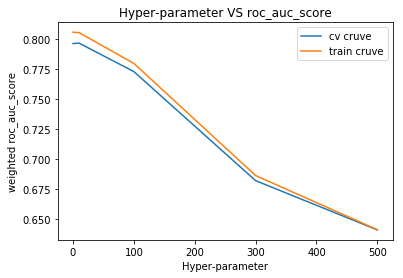

In [28]:
train_AUC, cv_AUC ,alphas=hyper_parametertunning(x_train_BOW,x_cv_BOW,x_cv,x_train,y_train,y_cv)
data_frame = pd.DataFrame({'alphas':alphas,'train_AUC':train_AUC,'cv_AUC':cv_AUC})
print(data_frame)
plt.plot(alphas,cv_AUC, label='cv cruve')
plt.plot(alphas,train_AUC ,label='train cruve')
plt.xlabel('Hyper-parameter')
plt.ylabel('weighted roc_auc_score')
plt.title('Hyper-parameter VS roc_auc_score')
plt.legend()
plt.show()

> Applying best hyperparameter to Naive bayes

In [35]:
## Test data
classifier = MultinomialNB(alpha=0.00001)
classifier.fit(x_train_BOW,y_train)
x_test_BOW_predicted = classifier.predict_proba(x_test_BOW)[:,1]
x_test_BOW_predicted_class = classifier.predict(x_test_BOW)
x_train_BOW_predicted = classifier.predict_proba(x_train_BOW)[:,1]
x_test['naive_proba'] = x_test_BOW_predicted
subgroup = parameters(x_test)
identity_columns = subgroup
MODEL_NAME = 'naive_proba'
TOXICITY_COLUMN  = 'class'
bias_metrics_df = compute_bias_metrics_for_model(x_test, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
AUC_test = get_final_metric(bias_metrics_df, calculate_overall_auc(x_test, MODEL_NAME))

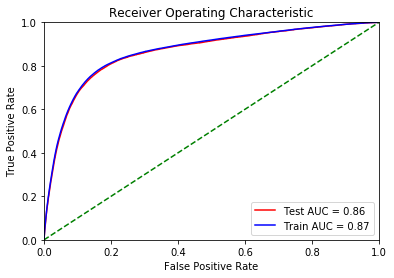

In [143]:
roc_auc_test,roc_auc_train,best_threshold_test,best_threshold_train = Plot_AUC_ROC_curve(y_test,y_train,x_test_BOW_predicted,x_train_BOW_predicted)

In [145]:
print('roc_auc_test : ',roc_auc_test)
print('roc_auc_train : ',roc_auc_train)
print('best_threshold_test : ',best_threshold_test)
print('best_threshold_train : ',best_threshold_train)

roc_auc_test :  0.8637008288715088
roc_auc_train :  0.8670686139588653
best_threshold_test :  0.17719085937191428
best_threshold_train :  0.1738937373934352


> As we can see the weighted AUC matric mitigate the effect of bias word.
* Simple AUC = 0.8637
* weighted  AUC = 0.7979 
* the best threshold we got approx is 0.17 

> Confusion Matrix

In [146]:
## making confusion matrix
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
def confusion__matrix(y_test,Y_predicted):
    cm=confusion_matrix(y_test,Y_predicted)
    print(cm)
    ax= plt.subplot();
    cm_= cm.reshape(4) # count 
    percentage = ((cm_/cm_.sum()).round(4))*100 # in percentage
    group_names_ = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = []
    for i in range(4):
        str_ = group_names_[i] + '\n'+ str(cm_[i]) + '\n'+ str(percentage[i])+"%"
        group_names.append(str_)
#     group_names = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = np.array(group_names).reshape(2,2)
    sns.heatmap(cm, annot=group_names,fmt="",cmap='Blues')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_ylim(2.0, 0)
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']);
    ax.yaxis.set_ticklabels(['0','1']);

[[230065  17987]
 [  8882  12753]]


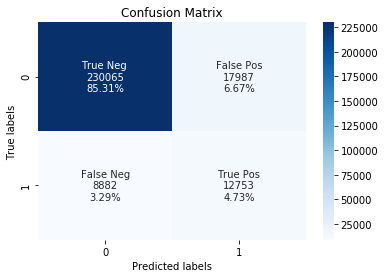

In [147]:
confusion__matrix(y_test,x_test_BOW_predicted_class)

# 2. Naive Bayes model with TFIDF

### Loding Preprocessed data  for ML models

In [43]:
import pickle
  
# Open the file in binary mode
with open('data_TFIDF.pkl', 'rb') as file:
      
    # Call load method to deserialze
    x_train_TFIDF , x_cv_TFIDF , x_test_TFIDF, y_train, y_cv, y_test,Test_Final_pre_text_data_ML = pickle.load(file)
 

### Loding data which contain all Subgroup identity for ML models

In [3]:
import pickle
# Open the file in binary mode
with open('data_BOW.pkl', 'rb') as file: 
    # Call load method to deserialze
    x_train_BOW , x_cv_BOW , x_test_BOW, y_train, y_cv, y_test,Test_Final_pre_text_data_ML_BOW = pickle.load(file)

In [160]:
import pickle
  
# Open the file in binary mode
with open('data_train_test_cv_csv_all_columns.pkl', 'rb') as file:
      
    # Call load method to deserialze
    x_train, x_cv , x_test, y_train, y_cv, y_test = pickle.load(file)

> ## Hyperparameter Tunning.

In [ ]:
import pickle
  
# Open the file in binary mode
with open('data_TFIDF.pkl', 'rb') as file:
      
    # Call load method to deserialze
    x_train_TFIDF , x_cv_TFIDF , x_test_TFIDF, y_train, y_cv, y_test,Test_Final_pre_text_data_ML = pickle.load(file)
 

> Handling Nan Values and Converting_into_boolean 

In [16]:
def Converting_into_boolean(new_data):
    new_data['asian'] = new_data['asian'].fillna(0)
    new_data['asian'] = new_data['asian'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['atheist'] = new_data['atheist'].fillna(0)
    new_data['atheist'] = new_data['atheist'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['bisexual'] = new_data['bisexual'].fillna(0)
    new_data['bisexual'] = new_data['bisexual'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['black'] = new_data['black'].fillna(0)
    new_data['black'] = new_data['black'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['buddhist'] = new_data['buddhist'].fillna(0)
    new_data['buddhist'] = new_data['buddhist'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['christian'] = new_data['christian'].fillna(0)
    new_data['christian'] = new_data['christian'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['female'] = new_data['female'].fillna(0)
    new_data['female'] = new_data['female'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['heterosexual'] = new_data['heterosexual'].fillna(0)
    new_data['heterosexual'] = new_data['heterosexual'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['hindu'] = new_data['hindu'].fillna(0)
    new_data['hindu'] = new_data['hindu'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].fillna(0)
    new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['intellectual_or_learning_disability'] = new_data['intellectual_or_learning_disability'].fillna(0)
    new_data['intellectual_or_learning_disability'] = new_data['intellectual_or_learning_disability'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['jewish'] = new_data['jewish'].fillna(0)
    new_data['jewish'] = new_data['jewish'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['latino'] = new_data['latino'].fillna(0)
    new_data['latino'] = new_data['latino'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['male'] = new_data['male'].fillna(0)
    new_data['male'] = new_data['male'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['muslim'] = new_data['muslim'].fillna(0)
    new_data['muslim'] = new_data['muslim'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_disability'] = new_data['other_disability'].fillna(0)
    new_data['other_disability'] = new_data['other_disability'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_gender'] = new_data['other_gender'].fillna(0)
    new_data['other_gender'] = new_data['other_gender'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].fillna(0)
    new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_religion'] = new_data['other_religion'].fillna(0)
    new_data['other_religion'] = new_data['other_religion'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].fillna(0)
    new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['physical_disability'] = new_data['physical_disability'].fillna(0)
    new_data['physical_disability'] = new_data['physical_disability'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['psychiatric_or_mental_illness'] = new_data['psychiatric_or_mental_illness'].fillna(0)
    new_data['psychiatric_or_mental_illness'] = new_data['psychiatric_or_mental_illness'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['transgender'] = new_data['transgender'].fillna(0)
    new_data['transgender'] = new_data['transgender'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['white'] = new_data['white'].fillna(0)
    new_data['white'] = new_data['white'].apply(lambda x: 0 if x < 0.5 else 1)
    
    return new_data

> Function which calculate bias AUC

In [164]:
SUBGROUP_AUC = 'subgroup_auc'
BPSN_AUC = 'bpsn_auc'  # stands for background positive, subgroup negative
BNSP_AUC = 'bnsp_auc'  # stands for background negative, subgroup positive

def compute_auc(y_true, y_pred):
    try:
        return metrics.roc_auc_score(y_true, y_pred)
    except ValueError:
        return np.nan

def compute_subgroup_auc(df, subgroup, label, model_name):
    subgroup_examples = df[df[subgroup]==1]
    return compute_auc(subgroup_examples[label], subgroup_examples[model_name])

def compute_bpsn_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup negative examples and the background positive examples."""
    subgroup_negative_examples = df[(df[subgroup]==1) & (df[label]=='non-toxic')]
    non_subgroup_positive_examples = df[(df[subgroup]==0) & (df[label]=='toxic')]
    examples = subgroup_negative_examples.append(non_subgroup_positive_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bnsp_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup positive examples and the background negative examples."""
    subgroup_positive_examples = df[(df[subgroup]==1)&(df[label]=='toxic')]
    non_subgroup_negative_examples = df[(df[subgroup]==0) & (df[label]=='non-toxic')]
    examples = subgroup_positive_examples.append(non_subgroup_negative_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bias_metrics_for_model(dataset,
                                   subgroups,
                                   model,
                                   label_col,
                                   include_asegs=False):
    """Computes per-subgroup metrics for all subgroups and one model."""
    records = []
    for subgroup in subgroups:
        record = {
            'subgroup': subgroup,
            'subgroup_size': dataset[subgroup].sum()
        }
        record[SUBGROUP_AUC] = compute_subgroup_auc(dataset, subgroup, label_col, model)
        record[BPSN_AUC] = compute_bpsn_auc(dataset, subgroup, label_col, model)
        record[BNSP_AUC] = compute_bnsp_auc(dataset, subgroup, label_col, model)
        records.append(record)
    return pd.DataFrame(records).sort_values('subgroup_auc', ascending=True)

# identity_columns = subgroup
# MODEL_NAME = 'naive_proba'
# TOXICITY_COLUMN  = 'class'
# bias_metrics_df = compute_bias_metrics_for_model(x_cv_1, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
# bias_metrics_df


> Function which caluclate final_metric (weighted AUC)

In [165]:
TOXICITY_COLUMN = 'class'
TEXT_COLUMN = 'comment_text'
MODEL_NAME = 'naive_proba'
def calculate_overall_auc(df, model_name):
    true_labels = df[TOXICITY_COLUMN]
    predicted_labels = df[model_name]
    return metrics.roc_auc_score(true_labels, predicted_labels)

def power_mean(series, p):
    total = sum(np.power(series, p))
    return np.power(total / len(series), 1 / p)

def get_final_metric(bias_df, overall_auc, POWER=-5, OVERALL_MODEL_WEIGHT=0.25):
    bias_score = np.average([
        power_mean(bias_df[SUBGROUP_AUC], POWER),
        power_mean(bias_df[BPSN_AUC], POWER),
        power_mean(bias_df[BNSP_AUC], POWER)
    ])
    return (OVERALL_MODEL_WEIGHT * overall_auc) + ((1 - OVERALL_MODEL_WEIGHT) * bias_score)
    
# get_final_metric(bias_metrics_df, calculate_overall_auc(x_cv_1, MODEL_NAME))


> function only return that identity/subgroups which occurs

In [166]:
# this function only return that identity/subgroups which occurs
def parameters(x_cv):
    x_cv = x_cv[['asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white','class']]
    list_ = x_cv.columns[:24]  # droping class colummn
    subgroup = []
    for i in list_:
        if x_cv[x_cv[i]==1][i].count() >500:
#             print(i,':',x_cv[x_cv[i] ==1][i].count())
            subgroup.append(i)
    return subgroup

> Function to calculate Confusion matrix

In [167]:
## making confusion matrix
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
def confusion__matrix(y_test,Y_predicted):
    cm=confusion_matrix(y_test,Y_predicted)
    print(cm)
    ax= plt.subplot();
    cm_= cm.reshape(4) # count 
    percentage = ((cm_/cm_.sum()).round(4))*100 # in percentage
    group_names_ = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = []
    for i in range(4):
        str_ = group_names_[i] + '\n'+ str(cm_[i]) + '\n'+ str(percentage[i])+"%"
        group_names.append(str_)
#     group_names = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = np.array(group_names).reshape(2,2)
    sns.heatmap(cm, annot=group_names,fmt="",cmap='Blues')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_ylim(2.0, 0)
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']);
    ax.yaxis.set_ticklabels(['0','1']);

> Function to plot AUC_ROC curve 

In [177]:
def Plot_AUC_ROC_curve(y_test,y_train,x_test_BOW_predicted,x_train_BOW_predicted):
    y_test_= [0 if i=='non-toxic' else 1 for i in y_test ]
    y_train_= [0 if i=='non-toxic' else 1 for i in y_train ]
    # x_test_BOW_predicted_class_= [0 if i=='non-toxic' else 1 for i in x_test_BOW_predicted_class ]

    fpr_test, tpr_test, threshold_test = roc_curve(y_test_, x_test_BOW_predicted,pos_label=1)
    fpr_train, tpr_train, threshold_train = roc_curve(y_train_, x_train_BOW_predicted,pos_label=1)

    
    roc_auc_test = roc_auc_score(y_test,x_test_BOW_predicted)
    roc_auc_train = roc_auc_score(y_train,x_train_BOW_predicted)

    plt.title('Receiver Operating Characteristic')

    plt.plot(fpr_test, tpr_test, 'r', label = 'Test AUC = %0.2f' % roc_auc_test)
    plt.plot(fpr_train, tpr_train, 'b', label = 'Train AUC = %0.2f' % roc_auc_train)

    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'g--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    ## Calculating best threshold  # https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
    best_threshold_test= threshold_test[np.argmax(tpr_test - fpr_test)]
    best_threshold_train= threshold_train[np.argmax(tpr_train - fpr_train)]
    return roc_auc_test,roc_auc_train,best_threshold_test,best_threshold_train ## simple AUC score

> Function which perform hyperparameter tunning

In [169]:
from tqdm import tqdm

In [170]:
def hyper_parametertunning(x_train_BOW,x_cv_BOW,x_cv,x_train,y_train,y_cv):
    classifier = MultinomialNB() #classifier   
    alphas=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,300,500]
    train_AUC = []
    cv_AUC = []
    for i in tqdm(alphas):
        classifier = MultinomialNB(alpha=i)
        classifier.fit(x_train_BOW,y_train)
        
        ## Calculating AUC for x_CV
        x_cv_BOW_predicted = classifier.predict_proba(x_cv_BOW)[:,1]
        x_cv['naive_proba'] = x_cv_BOW_predicted
        subgroup = parameters(x_cv)
        identity_columns = subgroup
        MODEL_NAME = 'naive_proba'
        TOXICITY_COLUMN  = 'class'
        bias_metrics_df = compute_bias_metrics_for_model(x_cv, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
        AUC_CV = get_final_metric(bias_metrics_df, calculate_overall_auc(x_cv, MODEL_NAME))
        cv_AUC.append(AUC_CV)
        
        
        ## Calculating AUC for x_train
        x_train_BOW_predicted = classifier.predict_proba(x_train_BOW)[:,1]
        x_train['naive_proba'] = x_train_BOW_predicted
        subgroup = parameters(x_train)
        identity_columns = subgroup
        MODEL_NAME = 'naive_proba'
        TOXICITY_COLUMN  = 'class'
        bias_metrics_df = compute_bias_metrics_for_model(x_train, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
        AUC_train = get_final_metric(bias_metrics_df, calculate_overall_auc(x_train, MODEL_NAME))
        train_AUC.append(AUC_train)
        
        
        
        
    return train_AUC, cv_AUC ,alphas

> preparing data  Handling Nan Values and Converting_into_boolean 

In [161]:
x_train = Converting_into_boolean(x_train)
x_cv = Converting_into_boolean(x_cv)
x_test = Converting_into_boolean(x_test)

> Calling hyper_parametertunning function

In [24]:
import pandas as pd

In [ ]:
 x_train_TFIDF , x_cv_TFIDF , x_test_TFIDF

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [13:15<00:00, 79.59s/it]


      alphas  train_AUC    cv_AUC
0    0.00001   0.847557  0.839623
1    0.00010   0.847557  0.839623
2    0.00100   0.847557  0.839626
3    0.01000   0.847572  0.839655
4    0.10000   0.847734  0.839937
5    1.00000   0.848635  0.841497
6   10.00000   0.833995  0.827790
7  100.00000   0.700661  0.698154
8  300.00000   0.635188  0.635583
9  500.00000   0.615041  0.616273


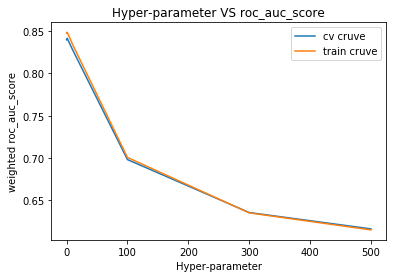

In [171]:
train_AUC, cv_AUC ,alphas=hyper_parametertunning(x_train_TFIDF,x_cv_TFIDF,x_cv,x_train,y_train,y_cv)
data_frame = pd.DataFrame({'alphas':alphas,'train_AUC':train_AUC,'cv_AUC':cv_AUC})
print(data_frame)
plt.plot(alphas,cv_AUC, label='cv cruve')
plt.plot(alphas,train_AUC ,label='train cruve')
plt.xlabel('Hyper-parameter')
plt.ylabel('weighted roc_auc_score')
plt.title('Hyper-parameter VS roc_auc_score')
plt.legend()
plt.show()

> Applying best hyperparameter to Naive bayes

In [172]:
## Test data
classifier = MultinomialNB(alpha=0.00001)
classifier.fit(x_train_TFIDF,y_train)
x_test_TFIDF_predicted = classifier.predict_proba(x_test_TFIDF)[:,1]
x_test_TFIDF_predicted_class = classifier.predict(x_test_TFIDF)
x_train_TFIDF_predicted = classifier.predict_proba(x_train_TFIDF)[:,1]
x_test['naive_proba'] = x_test_TFIDF_predicted
subgroup = parameters(x_test)
identity_columns = subgroup
MODEL_NAME = 'naive_proba'
TOXICITY_COLUMN  = 'class'
bias_metrics_df = compute_bias_metrics_for_model(x_test, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
AUC_test = get_final_metric(bias_metrics_df, calculate_overall_auc(x_test, MODEL_NAME))

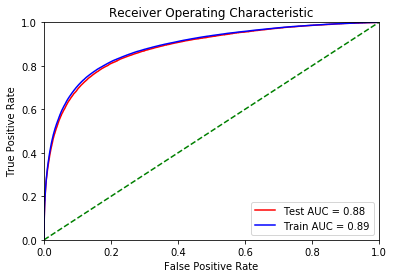

In [178]:
roc_auc_test,roc_auc_train,best_threshold_test,best_threshold_train = Plot_AUC_ROC_curve(y_test,y_train,x_test_TFIDF_predicted,x_train_TFIDF_predicted)

In [179]:
print('roc_auc_test : ',roc_auc_test)
print('roc_auc_train : ',roc_auc_train)
print('best_threshold_test : ',best_threshold_test)
print('best_threshold_train : ',best_threshold_train)

roc_auc_test :  0.8822306846424111
roc_auc_train :  0.8872055011552498
best_threshold_test :  0.09058715059793947
best_threshold_train :  0.09371936071524734


In [180]:
print(' weighted roc_auc_test : ',AUC_test)

 weighted roc_auc_test :  0.8420078150739102


> As we can see the weighted AUC matric mitigate the effect of bias word.
* Simple AUC = 0.88223
* weighted  AUC = 0.8420
* the best threshold we got approx is 0.09

> Confusion Matrix

In [181]:
## making confusion matrix
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
def confusion__matrix(y_test,Y_predicted):
    cm=confusion_matrix(y_test,Y_predicted)
    print(cm)
    ax= plt.subplot();
    cm_= cm.reshape(4) # count 
    percentage = ((cm_/cm_.sum()).round(4))*100 # in percentage
    group_names_ = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = []
    for i in range(4):
        str_ = group_names_[i] + '\n'+ str(cm_[i]) + '\n'+ str(percentage[i])+"%"
        group_names.append(str_)
#     group_names = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = np.array(group_names).reshape(2,2)
    sns.heatmap(cm, annot=group_names,fmt="",cmap='Blues')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_ylim(2.0, 0)
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']);
    ax.yaxis.set_ticklabels(['0','1']);

[[247963     89]
 [ 19966   1669]]


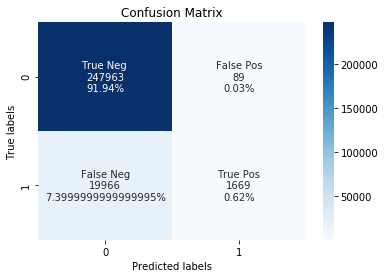

In [182]:
confusion__matrix(y_test,x_test_TFIDF_predicted_class)

# 3.  Logistic regression model with BOW

> ## Hyperparameter Tunning.

### Loding Preprocessed data  for ML models

In [44]:
import pickle
# Open the file in binary mode
with open('data_BOW.pkl', 'rb') as file: 
    # Call load method to deserialze
    x_train_BOW , x_cv_BOW , x_test_BOW, y_train, y_cv, y_test,Test_Final_pre_text_data_ML_BOW = pickle.load(file)

> Scaling donw the data in range of 0 to 1


In [30]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaler.fit(x_train_BOW)
# x_train_BOW = scaler.transform(x_train_BOW)
# x_cv_BOW = scaler.transform(x_cv_BOW)
# x_test_BOW = scaler.transform(x_test_BOW)


In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
from sklearn.preprocessing import MaxAbsScaler

transformer = MaxAbsScaler().fit(x_train_BOW)
x_train_BOW = transformer.transform(x_train_BOW)

x_cv_BOW = transformer.transform(x_cv_BOW)

x_test_BOW = transformer.transform(x_test_BOW)


### Loding data which contain all Subgroup identity for ML models

In [46]:
import pickle
  
# Open the file in binary mode
with open('data_train_test_cv_csv_all_columns.pkl', 'rb') as file:
      
    # Call load method to deserialze
    x_train, x_cv , x_test, y_train, y_cv, y_test = pickle.load(file)

In [10]:
x_train_BOW.shape

(1298988, 10000)

> Handling Nan Values and Converting_into_boolean 

In [11]:
def Converting_into_boolean(new_data):
    new_data['asian'] = new_data['asian'].fillna(0)
    new_data['asian'] = new_data['asian'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['atheist'] = new_data['atheist'].fillna(0)
    new_data['atheist'] = new_data['atheist'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['bisexual'] = new_data['bisexual'].fillna(0)
    new_data['bisexual'] = new_data['bisexual'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['black'] = new_data['black'].fillna(0)
    new_data['black'] = new_data['black'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['buddhist'] = new_data['buddhist'].fillna(0)
    new_data['buddhist'] = new_data['buddhist'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['christian'] = new_data['christian'].fillna(0)
    new_data['christian'] = new_data['christian'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['female'] = new_data['female'].fillna(0)
    new_data['female'] = new_data['female'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['heterosexual'] = new_data['heterosexual'].fillna(0)
    new_data['heterosexual'] = new_data['heterosexual'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['hindu'] = new_data['hindu'].fillna(0)
    new_data['hindu'] = new_data['hindu'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].fillna(0)
    new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['intellectual_or_learning_disability'] = new_data['intellectual_or_learning_disability'].fillna(0)
    new_data['intellectual_or_learning_disability'] = new_data['intellectual_or_learning_disability'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['jewish'] = new_data['jewish'].fillna(0)
    new_data['jewish'] = new_data['jewish'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['latino'] = new_data['latino'].fillna(0)
    new_data['latino'] = new_data['latino'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['male'] = new_data['male'].fillna(0)
    new_data['male'] = new_data['male'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['muslim'] = new_data['muslim'].fillna(0)
    new_data['muslim'] = new_data['muslim'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_disability'] = new_data['other_disability'].fillna(0)
    new_data['other_disability'] = new_data['other_disability'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_gender'] = new_data['other_gender'].fillna(0)
    new_data['other_gender'] = new_data['other_gender'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].fillna(0)
    new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_religion'] = new_data['other_religion'].fillna(0)
    new_data['other_religion'] = new_data['other_religion'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].fillna(0)
    new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['physical_disability'] = new_data['physical_disability'].fillna(0)
    new_data['physical_disability'] = new_data['physical_disability'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['psychiatric_or_mental_illness'] = new_data['psychiatric_or_mental_illness'].fillna(0)
    new_data['psychiatric_or_mental_illness'] = new_data['psychiatric_or_mental_illness'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['transgender'] = new_data['transgender'].fillna(0)
    new_data['transgender'] = new_data['transgender'].apply(lambda x: 0 if x < 0.5 else 1)

    new_data['white'] = new_data['white'].fillna(0)
    new_data['white'] = new_data['white'].apply(lambda x: 0 if x < 0.5 else 1)
    
    return new_data

> Function which calculate bias AUC

In [12]:
SUBGROUP_AUC = 'subgroup_auc'
BPSN_AUC = 'bpsn_auc'  # stands for background positive, subgroup negative
BNSP_AUC = 'bnsp_auc'  # stands for background negative, subgroup positive

def compute_auc(y_true, y_pred):
    try:
        return metrics.roc_auc_score(y_true, y_pred)
    except ValueError:
        return np.nan

def compute_subgroup_auc(df, subgroup, label, model_name):
    subgroup_examples = df[df[subgroup]==1]
    return compute_auc(subgroup_examples[label], subgroup_examples[model_name])

def compute_bpsn_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup negative examples and the background positive examples."""
    subgroup_negative_examples = df[(df[subgroup]==1) & (df[label]=='non-toxic')]
    non_subgroup_positive_examples = df[(df[subgroup]==0) & (df[label]=='toxic')]
    examples = subgroup_negative_examples.append(non_subgroup_positive_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bnsp_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup positive examples and the background negative examples."""
    subgroup_positive_examples = df[(df[subgroup]==1)&(df[label]=='toxic')]
    non_subgroup_negative_examples = df[(df[subgroup]==0) & (df[label]=='non-toxic')]
    examples = subgroup_positive_examples.append(non_subgroup_negative_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bias_metrics_for_model(dataset,
                                   subgroups,
                                   model,
                                   label_col,
                                   include_asegs=False):
    """Computes per-subgroup metrics for all subgroups and one model."""
    records = []
    for subgroup in subgroups:
        record = {
            'subgroup': subgroup,
            'subgroup_size': dataset[subgroup].sum()
        }
        record[SUBGROUP_AUC] = compute_subgroup_auc(dataset, subgroup, label_col, model)
        record[BPSN_AUC] = compute_bpsn_auc(dataset, subgroup, label_col, model)
        record[BNSP_AUC] = compute_bnsp_auc(dataset, subgroup, label_col, model)
        records.append(record)
    return pd.DataFrame(records).sort_values('subgroup_auc', ascending=True)

# identity_columns = subgroup
# MODEL_NAME = 'naive_proba'
# TOXICITY_COLUMN  = 'class'
# bias_metrics_df = compute_bias_metrics_for_model(x_cv_1, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
# bias_metrics_df


> Function which caluclate final_metric (weighted AUC)

In [13]:
TOXICITY_COLUMN = 'class'
TEXT_COLUMN = 'comment_text'
MODEL_NAME = 'naive_proba'
def calculate_overall_auc(df, model_name):
    true_labels = df[TOXICITY_COLUMN]
    predicted_labels = df[model_name]
    return metrics.roc_auc_score(true_labels, predicted_labels)

def power_mean(series, p):
    total = sum(np.power(series, p))
    return np.power(total / len(series), 1 / p)

def get_final_metric(bias_df, overall_auc, POWER=-5, OVERALL_MODEL_WEIGHT=0.25):
    bias_score = np.average([
        power_mean(bias_df[SUBGROUP_AUC], POWER),
        power_mean(bias_df[BPSN_AUC], POWER),
        power_mean(bias_df[BNSP_AUC], POWER)
    ])
    return (OVERALL_MODEL_WEIGHT * overall_auc) + ((1 - OVERALL_MODEL_WEIGHT) * bias_score)
    
# get_final_metric(bias_metrics_df, calculate_overall_auc(x_cv_1, MODEL_NAME))


> function only return that identity/subgroups which occurs

In [14]:
# this function only return that identity/subgroups which occurs
def parameters(x_cv):
    x_cv = x_cv[['asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white','class']]
    list_ = x_cv.columns[:24]  # droping class colummn
    subgroup = []
    for i in list_:
        if x_cv[x_cv[i]==1][i].count() >500:
#             print(i,':',x_cv[x_cv[i] ==1][i].count())
            subgroup.append(i)
    return subgroup

> Function to calculate Confusion matrix

In [15]:
## making confusion matrix
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
def confusion__matrix(y_test,Y_predicted):
    cm=confusion_matrix(y_test,Y_predicted)
    print(cm)
    ax= plt.subplot();
    cm_= cm.reshape(4) # count 
    percentage = ((cm_/cm_.sum()).round(4))*100 # in percentage
    group_names_ = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = []
    for i in range(4):
        str_ = group_names_[i] + '\n'+ str(cm_[i]) + '\n'+ str(percentage[i])+"%"
        group_names.append(str_)
#     group_names = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = np.array(group_names).reshape(2,2)
    sns.heatmap(cm, annot=group_names,fmt="",cmap='Blues')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_ylim(2.0, 0)
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']);
    ax.yaxis.set_ticklabels(['0','1']);

> Function to plot AUC_ROC curve 

In [35]:
def Plot_AUC_ROC_curve(y_test,y_train,x_test_BOW_predicted,x_train_BOW_predicted):
    y_test_= [0 if i=='non-toxic' else 1 for i in y_test ]
    y_train_= [0 if i=='non-toxic' else 1 for i in y_train ]
    # x_test_BOW_predicted_class_= [0 if i=='non-toxic' else 1 for i in x_test_BOW_predicted_class ]

    fpr_test, tpr_test, threshold_test = roc_curve(y_test_, x_test_BOW_predicted,pos_label=1)
    fpr_train, tpr_train, threshold_train = roc_curve(y_train_, x_train_BOW_predicted,pos_label=1)

    
    roc_auc_test = roc_auc_score(y_test,x_test_BOW_predicted)
    roc_auc_train = roc_auc_score(y_train,x_train_BOW_predicted)

    plt.title('Receiver Operating Characteristic')

    plt.plot(fpr_test, tpr_test, 'r', label = 'Test AUC = %0.2f' % roc_auc_test)
    plt.plot(fpr_train, tpr_train, 'b', label = 'Train AUC = %0.2f' % roc_auc_train)

    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'g--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    ## Calculating best threshold  # https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
    best_threshold_test= threshold_test[np.argmax(tpr_test - fpr_test)]
    best_threshold_train= threshold_train[np.argmax(tpr_train - fpr_train)]
    return roc_auc_test,roc_auc_train,best_threshold_test,best_threshold_train ## simple AUC score

> Function which perform hyperparameter tunning

In [17]:
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression

In [26]:
def hyper_parametertunning(x_train_BOW,x_cv_BOW,x_cv,x_train,y_train,y_cv):
#     classifier = LogisticRegression() #classifier   
    C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,300,500]
    train_AUC = []
    cv_AUC = []
    for i in tqdm(C):
        classifier = LogisticRegression(C=i)
        classifier.fit(x_train_BOW,y_train)
        
        ## Calculating AUC for x_CV
        x_cv_BOW_predicted = classifier.predict_proba(x_cv_BOW)[:,1]
        x_cv['naive_proba'] = x_cv_BOW_predicted
        subgroup = parameters(x_cv)
        identity_columns = subgroup
        MODEL_NAME = 'naive_proba'
        TOXICITY_COLUMN  = 'class'
        bias_metrics_df = compute_bias_metrics_for_model(x_cv, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
        AUC_CV = get_final_metric(bias_metrics_df, calculate_overall_auc(x_cv, MODEL_NAME))
        cv_AUC.append(AUC_CV)
        
        
        ## Calculating AUC for x_train
        x_train_BOW_predicted = classifier.predict_proba(x_train_BOW)[:,1]
        x_train['naive_proba'] = x_train_BOW_predicted
        subgroup = parameters(x_train)
        identity_columns = subgroup
        MODEL_NAME = 'naive_proba'
        TOXICITY_COLUMN  = 'class'
        bias_metrics_df = compute_bias_metrics_for_model(x_train, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
        AUC_train = get_final_metric(bias_metrics_df, calculate_overall_auc(x_train, MODEL_NAME))
        train_AUC.append(AUC_train)
        
        
        
        
    return train_AUC, cv_AUC ,C

> preparing data  Handling Nan Values and Converting_into_boolean 

In [47]:
x_train = Converting_into_boolean(x_train)
x_cv = Converting_into_boolean(x_cv)
x_test = Converting_into_boolean(x_test)

> Calling hyper_parametertunning function

In [24]:
import pandas as pd

           C  train_AUC    cv_AUC
0    0.00001   0.783274  0.780272
1    0.00010   0.785029  0.782022
2    0.00100   0.792675  0.789474
3    0.01000   0.822608  0.819003
4    0.10000   0.868826  0.865637
5    1.00000   0.882698  0.875887
6   10.00000   0.883793  0.874155
7  100.00000   0.884101  0.873694
8  300.00000   0.883298  0.874688
9  500.00000   0.883708  0.873947


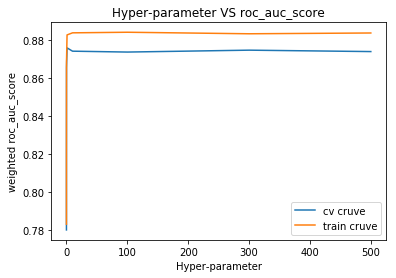

In [59]:
train_AUC, cv_AUC ,C=hyper_parametertunning(x_train_BOW,x_cv_BOW,x_cv,x_train,y_train,y_cv)
data_frame = pd.DataFrame({'C':C,'train_AUC':train_AUC,'cv_AUC':cv_AUC})
print(data_frame)
plt.plot(C,cv_AUC, label='cv cruve')
plt.plot(C,train_AUC ,label='train cruve')
plt.xlabel('Hyper-parameter')
plt.ylabel('weighted roc_auc_score')
plt.title('Hyper-parameter VS roc_auc_score')
plt.legend()
plt.show()

> Applying best hyperparameter to Naive bayes

In [60]:
## Test data
classifier =LogisticRegression(C=1)
classifier.fit(x_train_BOW,y_train)
x_test_BOW_predicted = classifier.predict_proba(x_test_BOW)[:,1]
x_test_BOW_predicted_class = classifier.predict(x_test_BOW)
x_train_BOW_predicted = classifier.predict_proba(x_train_BOW)[:,1]
x_test['naive_proba'] = x_test_BOW_predicted
subgroup = parameters(x_test)
identity_columns = subgroup
MODEL_NAME = 'naive_proba'
TOXICITY_COLUMN  = 'class'
bias_metrics_df = compute_bias_metrics_for_model(x_test, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
AUC_test = get_final_metric(bias_metrics_df, calculate_overall_auc(x_test, MODEL_NAME))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


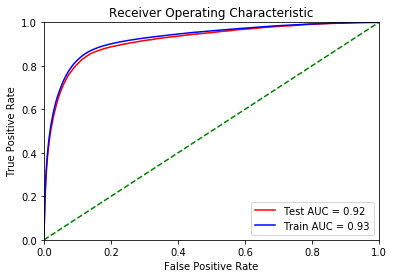

In [61]:
roc_auc_test,roc_auc_train,best_threshold_test,best_threshold_train = Plot_AUC_ROC_curve(y_test,y_train,x_test_BOW_predicted,x_train_BOW_predicted)

In [62]:
print('roc_auc_test : ',roc_auc_test)
print('roc_auc_train : ',roc_auc_train)
print('best_threshold_test : ',best_threshold_test)
print('best_threshold_train : ',best_threshold_train)

roc_auc_test :  0.91777588915981
roc_auc_train :  0.9257281198508289
best_threshold_test :  0.07234636229555912
best_threshold_train :  0.07475144435277928


In [63]:
AUC_test

0.8711512701958214

> As we can see the weighted AUC matric mitigate the effect of bias word.
* Simple AUC = 0.9177
* weighted  AUC = 0.8711
* the best threshold we got approx is 0.074

> Confusion Matrix

[[245519   2533]
 [ 13414   8221]]


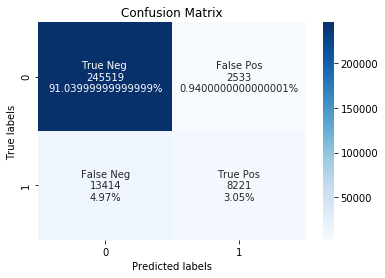

In [64]:
confusion__matrix(y_test,x_test_BOW_predicted_class)

# 4. Logistic regression model with TFIDF

### Loding Preprocessed data  for ML models

In [65]:
import pickle
  
# Open the file in binary mode
with open('data_TFIDF.pkl', 'rb') as file:
      
    # Call load method to deserialze
    x_train_TFIDF , x_cv_TFIDF , x_test_TFIDF, y_train, y_cv, y_test,Test_Final_pre_text_data_ML = pickle.load(file)
 

In [66]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
from sklearn.preprocessing import MaxAbsScaler

transformer = MaxAbsScaler().fit(x_train_TFIDF)
x_train_TFIDF = transformer.transform(x_train_TFIDF)

x_cv_TFIDF = transformer.transform(x_cv_TFIDF)

x_test_TFIDF = transformer.transform(x_test_TFIDF)



### Loding data which contain all Subgroup identity for ML models

In [67]:
import pickle
  
# Open the file in binary mode
with open('data_train_test_cv_csv_all_columns.pkl', 'rb') as file:
      
    # Call load method to deserialze
    x_train, x_cv , x_test, y_train, y_cv, y_test = pickle.load(file)

> ## Hyperparameter Tunning.

> Function which calculate bias AUC

In [68]:
SUBGROUP_AUC = 'subgroup_auc'
BPSN_AUC = 'bpsn_auc'  # stands for background positive, subgroup negative
BNSP_AUC = 'bnsp_auc'  # stands for background negative, subgroup positive

def compute_auc(y_true, y_pred):
    try:
        return metrics.roc_auc_score(y_true, y_pred)
    except ValueError:
        return np.nan

def compute_subgroup_auc(df, subgroup, label, model_name):
    subgroup_examples = df[df[subgroup]==1]
    return compute_auc(subgroup_examples[label], subgroup_examples[model_name])

def compute_bpsn_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup negative examples and the background positive examples."""
    subgroup_negative_examples = df[(df[subgroup]==1) & (df[label]=='non-toxic')]
    non_subgroup_positive_examples = df[(df[subgroup]==0) & (df[label]=='toxic')]
    examples = subgroup_negative_examples.append(non_subgroup_positive_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bnsp_auc(df, subgroup, label, model_name):
    """Computes the AUC of the within-subgroup positive examples and the background negative examples."""
    subgroup_positive_examples = df[(df[subgroup]==1)&(df[label]=='toxic')]
    non_subgroup_negative_examples = df[(df[subgroup]==0) & (df[label]=='non-toxic')]
    examples = subgroup_positive_examples.append(non_subgroup_negative_examples)
    return compute_auc(examples[label], examples[model_name])

def compute_bias_metrics_for_model(dataset,
                                   subgroups,
                                   model,
                                   label_col,
                                   include_asegs=False):
    """Computes per-subgroup metrics for all subgroups and one model."""
    records = []
    for subgroup in subgroups:
        record = {
            'subgroup': subgroup,
            'subgroup_size': dataset[subgroup].sum()
        }
        record[SUBGROUP_AUC] = compute_subgroup_auc(dataset, subgroup, label_col, model)
        record[BPSN_AUC] = compute_bpsn_auc(dataset, subgroup, label_col, model)
        record[BNSP_AUC] = compute_bnsp_auc(dataset, subgroup, label_col, model)
        records.append(record)
    return pd.DataFrame(records).sort_values('subgroup_auc', ascending=True)

# identity_columns = subgroup
# MODEL_NAME = 'naive_proba'
# TOXICITY_COLUMN  = 'class'
# bias_metrics_df = compute_bias_metrics_for_model(x_cv_1, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
# bias_metrics_df


> Function which caluclate final_metric (weighted AUC)

In [69]:
TOXICITY_COLUMN = 'class'
TEXT_COLUMN = 'comment_text'
MODEL_NAME = 'naive_proba'
def calculate_overall_auc(df, model_name):
    true_labels = df[TOXICITY_COLUMN]
    predicted_labels = df[model_name]
    return metrics.roc_auc_score(true_labels, predicted_labels)

def power_mean(series, p):
    total = sum(np.power(series, p))
    return np.power(total / len(series), 1 / p)

def get_final_metric(bias_df, overall_auc, POWER=-5, OVERALL_MODEL_WEIGHT=0.25):
    bias_score = np.average([
        power_mean(bias_df[SUBGROUP_AUC], POWER),
        power_mean(bias_df[BPSN_AUC], POWER),
        power_mean(bias_df[BNSP_AUC], POWER)
    ])
    return (OVERALL_MODEL_WEIGHT * overall_auc) + ((1 - OVERALL_MODEL_WEIGHT) * bias_score)
    
# get_final_metric(bias_metrics_df, calculate_overall_auc(x_cv_1, MODEL_NAME))


> function only return that identity/subgroups which occurs

In [70]:
# this function only return that identity/subgroups which occurs
def parameters(x_cv):
    x_cv = x_cv[['asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white','class']]
    list_ = x_cv.columns[:24]  # droping class colummn
    subgroup = []
    for i in list_:
        if x_cv[x_cv[i]==1][i].count() >500:
#             print(i,':',x_cv[x_cv[i] ==1][i].count())
            subgroup.append(i)
    return subgroup

> Function to calculate Confusion matrix

In [71]:
## making confusion matrix
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
def confusion__matrix(y_test,Y_predicted):
    cm=confusion_matrix(y_test,Y_predicted)
    print(cm)
    ax= plt.subplot();
    cm_= cm.reshape(4) # count 
    percentage = ((cm_/cm_.sum()).round(4))*100 # in percentage
    group_names_ = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = []
    for i in range(4):
        str_ = group_names_[i] + '\n'+ str(cm_[i]) + '\n'+ str(percentage[i])+"%"
        group_names.append(str_)
#     group_names = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = np.array(group_names).reshape(2,2)
    sns.heatmap(cm, annot=group_names,fmt="",cmap='Blues')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_ylim(2.0, 0)
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']);
    ax.yaxis.set_ticklabels(['0','1']);

> Function to plot AUC_ROC curve 

In [72]:
def Plot_AUC_ROC_curve(y_test,y_train,x_test_BOW_predicted,x_train_BOW_predicted):
    y_test_= [0 if i=='non-toxic' else 1 for i in y_test ]
    y_train_= [0 if i=='non-toxic' else 1 for i in y_train ]
    # x_test_BOW_predicted_class_= [0 if i=='non-toxic' else 1 for i in x_test_BOW_predicted_class ]

    fpr_test, tpr_test, threshold_test = roc_curve(y_test_, x_test_BOW_predicted,pos_label=1)
    fpr_train, tpr_train, threshold_train = roc_curve(y_train_, x_train_BOW_predicted,pos_label=1)

    
    roc_auc_test = roc_auc_score(y_test,x_test_BOW_predicted)
    roc_auc_train = roc_auc_score(y_train,x_train_BOW_predicted)

    plt.title('Receiver Operating Characteristic')

    plt.plot(fpr_test, tpr_test, 'r', label = 'Test AUC = %0.2f' % roc_auc_test)
    plt.plot(fpr_train, tpr_train, 'b', label = 'Train AUC = %0.2f' % roc_auc_train)

    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'g--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    ## Calculating best threshold  # https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
    best_threshold_test= threshold_test[np.argmax(tpr_test - fpr_test)]
    best_threshold_train= threshold_train[np.argmax(tpr_train - fpr_train)]
    return roc_auc_test,roc_auc_train,best_threshold_test,best_threshold_train ## simple AUC score

> Function which perform hyperparameter tunning

In [73]:
from tqdm import tqdm

In [74]:
def hyper_parametertunning(x_train_TFIDF,x_cv_TFIDF,x_cv,x_train,y_train,y_cv):
#     classifier = LogisticRegression() #classifier   
    C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,300,500]
    train_AUC = []
    cv_AUC = []
    for i in tqdm(C):
        classifier = LogisticRegression(C=i)
        classifier.fit(x_train_TFIDF,y_train)
        
        ## Calculating AUC for x_CV
        x_cv_TFIDF_predicted = classifier.predict_proba(x_cv_TFIDF)[:,1]
        x_cv['naive_proba'] = x_cv_TFIDF_predicted
        subgroup = parameters(x_cv)
        identity_columns = subgroup
        MODEL_NAME = 'naive_proba'
        TOXICITY_COLUMN  = 'class'
        bias_metrics_df = compute_bias_metrics_for_model(x_cv, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
        AUC_CV = get_final_metric(bias_metrics_df, calculate_overall_auc(x_cv, MODEL_NAME))
        cv_AUC.append(AUC_CV)
        
        
        ## Calculating AUC for x_train
        x_train_TFIDF_predicted = classifier.predict_proba(x_train_TFIDF)[:,1]
        x_train['naive_proba'] = x_train_TFIDF_predicted
        subgroup = parameters(x_train)
        identity_columns = subgroup
        MODEL_NAME = 'naive_proba'
        TOXICITY_COLUMN  = 'class'
        bias_metrics_df = compute_bias_metrics_for_model(x_train, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
        AUC_train = get_final_metric(bias_metrics_df, calculate_overall_auc(x_train, MODEL_NAME))
        train_AUC.append(AUC_train)
        
        
        
        
    return train_AUC, cv_AUC ,C

> preparing data  Handling Nan Values and Converting_into_boolean 

In [75]:
x_train = Converting_into_boolean(x_train)
x_cv = Converting_into_boolean(x_cv)
x_test = Converting_into_boolean(x_test)

           C  train_AUC    cv_AUC
0    0.00001   0.792296  0.786861
1    0.00010   0.793338  0.787870
2    0.00100   0.802855  0.797237
3    0.01000   0.846816  0.841030
4    0.10000   0.882374  0.876519
5    1.00000   0.892452  0.883122
6   10.00000   0.892923  0.882322
7  100.00000   0.893539  0.882162
8  300.00000   0.893775  0.881281
9  500.00000   0.893918  0.882015


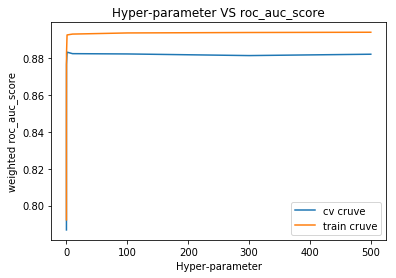

In [77]:
train_AUC, cv_AUC ,C=hyper_parametertunning(x_train_TFIDF,x_cv_TFIDF,x_cv,x_train,y_train,y_cv)
data_frame = pd.DataFrame({'C':C,'train_AUC':train_AUC,'cv_AUC':cv_AUC})
print(data_frame)
plt.plot(C,cv_AUC, label='cv cruve')
plt.plot(C,train_AUC ,label='train cruve')
plt.xlabel('Hyper-parameter')
plt.ylabel('weighted roc_auc_score')
plt.title('Hyper-parameter VS roc_auc_score')
plt.legend()
plt.show()

> Applying best hyperparameter to Naive bayes

In [78]:
## Test data
classifier = LogisticRegression(C=1)
classifier.fit(x_train_TFIDF,y_train)
x_test_TFIDF_predicted = classifier.predict_proba(x_test_TFIDF)[:,1]
x_test_TFIDF_predicted_class = classifier.predict(x_test_TFIDF)
x_train_TFIDF_predicted = classifier.predict_proba(x_train_TFIDF)[:,1]
x_test['naive_proba'] = x_test_TFIDF_predicted
subgroup = parameters(x_test)
identity_columns = subgroup
MODEL_NAME = 'naive_proba'
TOXICITY_COLUMN  = 'class'
bias_metrics_df = compute_bias_metrics_for_model(x_test, identity_columns, MODEL_NAME, TOXICITY_COLUMN)
AUC_test = get_final_metric(bias_metrics_df, calculate_overall_auc(x_test, MODEL_NAME))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


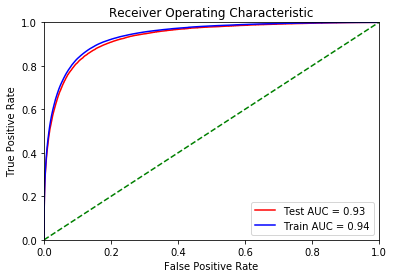

In [79]:
roc_auc_test,roc_auc_train,best_threshold_test,best_threshold_train = Plot_AUC_ROC_curve(y_test,y_train,x_test_TFIDF_predicted,x_train_TFIDF_predicted)

In [80]:
print('roc_auc_test : ',roc_auc_test)
print('roc_auc_train : ',roc_auc_train)
print('best_threshold_test : ',best_threshold_test)
print('best_threshold_train : ',best_threshold_train)

roc_auc_test :  0.9345803159182375
roc_auc_train :  0.9412647185164973
best_threshold_test :  0.06971346055572497
best_threshold_train :  0.0666739889637612


In [81]:
print(' weighted roc_auc_test : ',AUC_test)

 weighted roc_auc_test :  0.8831785558244345


> As we can see the weighted AUC matric mitigate the effect of bias word.
* Simple AUC = 0.9345
* weighted  AUC =  0.8831
* the best threshold we got approx is 0.06

> Confusion Matrix

In [ ]:
## making confusion matrix
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
def confusion__matrix(y_test,Y_predicted):
    cm=confusion_matrix(y_test,Y_predicted)
    print(cm)
    ax= plt.subplot();
    cm_= cm.reshape(4) # count 
    percentage = ((cm_/cm_.sum()).round(4))*100 # in percentage
    group_names_ = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = []
    for i in range(4):
        str_ = group_names_[i] + '\n'+ str(cm_[i]) + '\n'+ str(percentage[i])+"%"
        group_names.append(str_)
#     group_names = ['True Neg ','False Pos','False Neg','True Pos']
    group_names = np.array(group_names).reshape(2,2)
    sns.heatmap(cm, annot=group_names,fmt="",cmap='Blues')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_ylim(2.0, 0)
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']);
    ax.yaxis.set_ticklabels(['0','1']);

[[245120   2932]
 [ 11989   9646]]


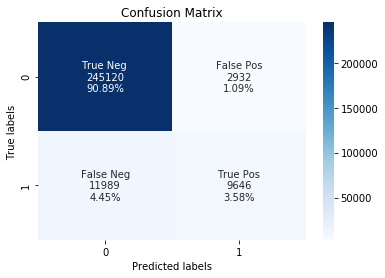

In [82]:
confusion__matrix(y_test,x_test_TFIDF_predicted_class)

In [90]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(['index',"Model ", "vectoriser", "Simpel AUC",'Weighted AUC','best threshold','FP','FN'])
  
# Add rows

# myTable.add_row(["1. Adding Date based Features ", "    ", "    "])
myTable.add_row(["1 ", "Naive Bayes",'BOW' ,"0.8637",'0.7979','0.17','6.67%','3.29%'])
myTable.add_row(["2 ", "Naive Bayes",'TFIDF', "0.88223",'0.8420','0.09','0.03%','7.399%'])
myTable.add_row(["3 ", "Logistic regression",'BOW' ,"0.9177",'0.8711','0.074','0.94%','4.97%'])
myTable.add_row(["4 ", "Logistic regression",'TFIDF' ,"0.9345",'0.8831','0.06','1.09%','4.45%'])
# myTable.add_row(["-------", "-------", "-------"])



print(myTable)

+-------+---------------------+------------+------------+--------------+----------------+-------+--------+
| index |        Model        | vectoriser | Simpel AUC | Weighted AUC | best threshold |   FP  |   FN   |
+-------+---------------------+------------+------------+--------------+----------------+-------+--------+
|   1   |     Naive Bayes     |    BOW     |   0.8637   |    0.7979    |      0.17      | 6.67% | 3.29%  |
|   2   |     Naive Bayes     |   TFIDF    |  0.88223   |    0.8420    |      0.09      | 0.03% | 7.399% |
|   3   | Logistic regression |    BOW     |   0.9177   |    0.8711    |     0.074      | 0.94% | 4.97%  |
|   4   | Logistic regression |   TFIDF    |   0.9345   |    0.8831    |      0.06      | 1.09% | 4.45%  |
+-------+---------------------+------------+------------+--------------+----------------+-------+--------+


> ## Observation :
* with  Naive Bayes with TFIDF we got lowest FP values 
* we can say the rather than classify the class labels based on threshold 0.5 we should  classify classes based on 0.1, if probability is < (1 - 0.1) classify as Non toxic other wise toxic.
https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e
* Other help full refrences :
    * https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
    * https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/?utm_source=blog&utm_medium=auc-roc-curve-machine-learning